# **Sea Level Predictor Assignment**
You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.
Use the data to complete the following tasks:
*   Use Pandas to import the data from epa-sea-level.csv.
*   Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
*   Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
*   Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
*   The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".
### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015. https://datahub.io/core/sea-level-rise 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('https://raw.githubusercontent.com/AlisterBaroi/sea-level-predictor/main/epa-sea-level.csv?token=GHSAT0AAAAAABSGSVKMFT2VFNC52SDNX3OEYSTZEOA')
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']

    # Create scatter plot
    plt.figure(figsize=(12,6))
    plt.scatter(x, y)
   
    # Create first line of best fit
    regress1 = linregress(x, y)
    last_year = df["Year"].max()
    df = df.append([{"Year": y} for y in range(last_year + 1, 2051)])
    line1 = df['Year'] * regress1.slope + regress1.intercept
    plt.plot(df["Year"], line1, label="First Line of Best Fit", color='red')

    # Create second line of best fit
    df_recent = df.loc[(df["Year"] >= 2000) & (df["Year"] <= last_year)]
    regress2 = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
    df_recent = df_recent.append([{"Year": y} for y in range(last_year + 1, 2051)])
    line2 = df_recent["Year"] * regress2.slope + regress2.intercept
    plt.plot(df_recent["Year"], line2, label="Second Line of Best Fit", color="orange")
    plt.legend()

    # Add labels and title
    plt.xlabel('Year', fontsize='15')
    plt.ylabel('Sea Level (inches)', fontsize='15')
    plt.title('Rise in Sea Level', fontsize='20')
    
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

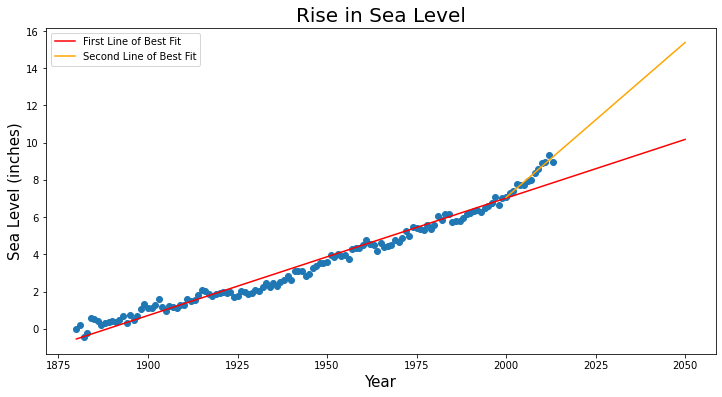

In [3]:
draw_plot()